In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y=make_blobs(random_state=0)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

loreg=LogisticRegression().fit(X_train,y_train)
print("Test set score: {:.2f}".format(loreg.score(X_test,y_test)))

Test set score: 0.88


In [2]:
import mglearn

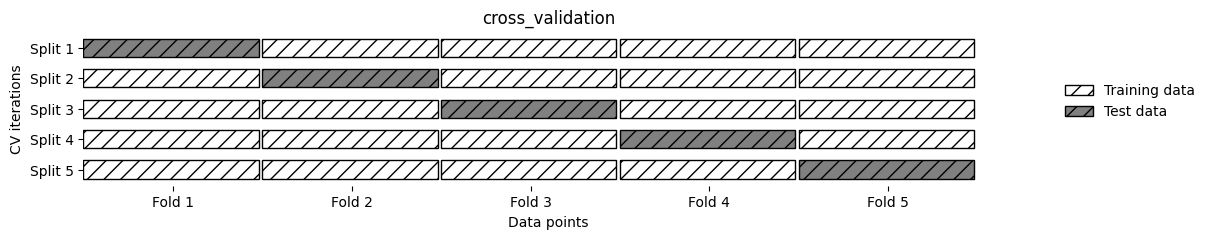

In [3]:
mglearn.plots.plot_cross_validation()

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
iris=load_iris()
loreg=LogisticRegression(max_iter=10000)

scores=cross_val_score(loreg,iris.data,iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
scores=cross_val_score(loreg,iris.data,iris.target,cv=5)
print('Cross-validation scores: {}'.format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.97


In [7]:
from sklearn.model_selection import cross_validate
res=cross_validate(loreg,iris.data,iris.target,cv=5,return_train_score=True)
display(res)

{'fit_time': array([0.02493048, 0.02622724, 0.01929426, 0.02026677, 0.02174497]),
 'score_time': array([0.00079465, 0.00074506, 0.00078702, 0.00078845, 0.00068831]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.024930,0.000795,0.966667,0.966667
1,0.026227,0.000745,1.000000,0.966667
2,0.019294,0.000787,0.933333,0.983333
3,0.020267,0.000788,0.966667,0.983333
4,0.021745,0.000688,1.000000,0.975000


Mean times and scores:
 fit_time       0.022493
score_time     0.000761
test_score     0.973333
train_score    0.975000
dtype: float64


### Stratified k-Fold Cross-Validation and Other Strategies

 In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset

For example, if 90% of your samples belong to class A and 10% of your samples belong to class B, then stratified cross-validation ensures that in each fold, 90% of samples belong to class A and 10% of samples belong to class B.

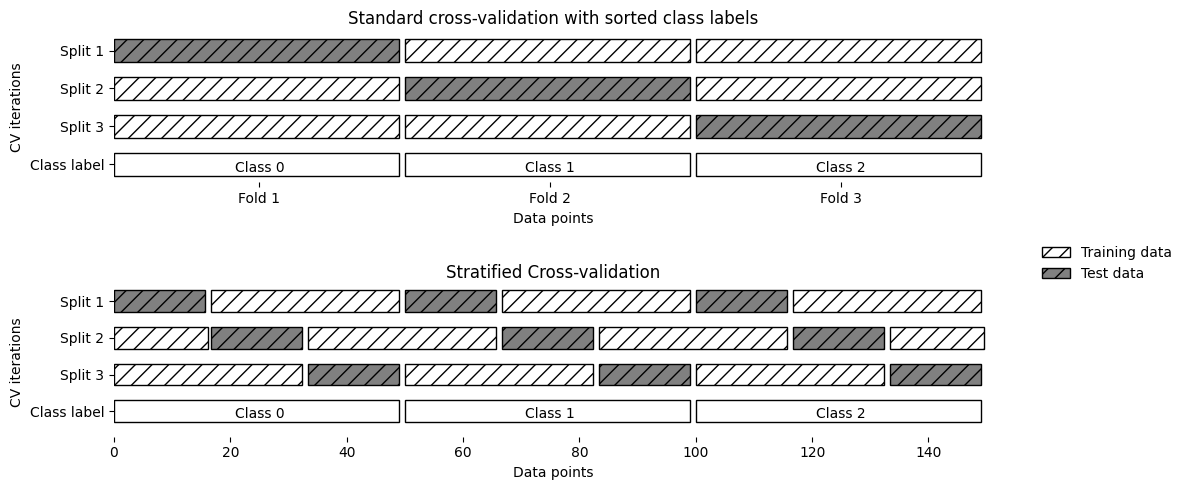

In [9]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5)


print("Cross-validation scores:\n{}".format(cross_val_score(loreg,iris.data,iris.target,cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(loreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [12]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(loreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


## Grid Search

In [13]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,random_state=0)

print("Size of the training set: {}  size of the test set: {}".format(X_train.shape[0],X_test.shape[0]))

best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_test,y_test)

        if score>best_score:
            best_score=score
            best_parameters={'C':C,'gamma':gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of the training set: 112  size of the test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### The Danger of Overfitting the Parameters and the Validation Set

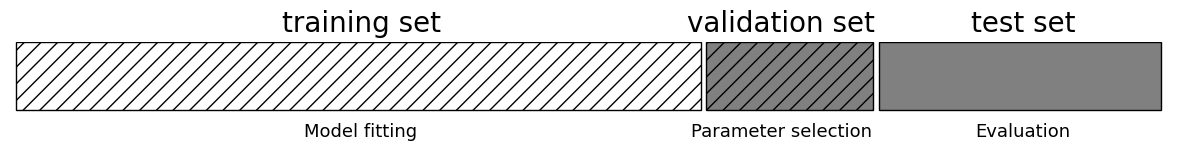

In [14]:
mglearn.plots.plot_threefold_split()

In [15]:
from sklearn.svm import SVC

# split data into train+validation set and test set

X_trainval,X_test,y_trainval,y_test=train_test_split(iris.data,iris.target,random_state=0)

# split train+validation set into training and validation sets

X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=1)

print("size of training set: {}    size of the validation set: {}   size of the testing set: {}".format(
    X_train.shape[0],X_valid.shape[0],X_test.shape[0]
))

size of training set: 84    size of the validation set: 28   size of the testing set: 38


In [18]:
best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm=SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score=svm.score(X_valid,y_valid)

        if score>best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}



svm=SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)
test_score=svm.score(X_test,y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))


Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### Grid Search with Cross-Validation

While the method of splitting the data into a training, a validation, and a test set that we just saw is workable, and relatively commonly used, it is quite sensitive to how exactly the data is split. From the output of the previous code snippet we can see that grid search selects 'C': 10, 'gamma': 0.001 as the best parameters, while the output of the code in the previous section selects 'C': 100, 'gamma': 0.001 as the best parameters. For a better estimate of the generalization performance, instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination. This method can be coded up as follows

In [22]:
best_score=0
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:

        svm=SVC(gamma=gamma,C=C)

        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean((scores))

        if score> best_score:
            best_score=score
            best_parameters={'C':C, 'gamma':gamma}



svm=SVC(**best_parameters)
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
print("Test score: {}".format(svm.score(X_test,y_test)))
print(best_parameters)






Test score: 0.9736842105263158
{'C': 10, 'gamma': 0.1}


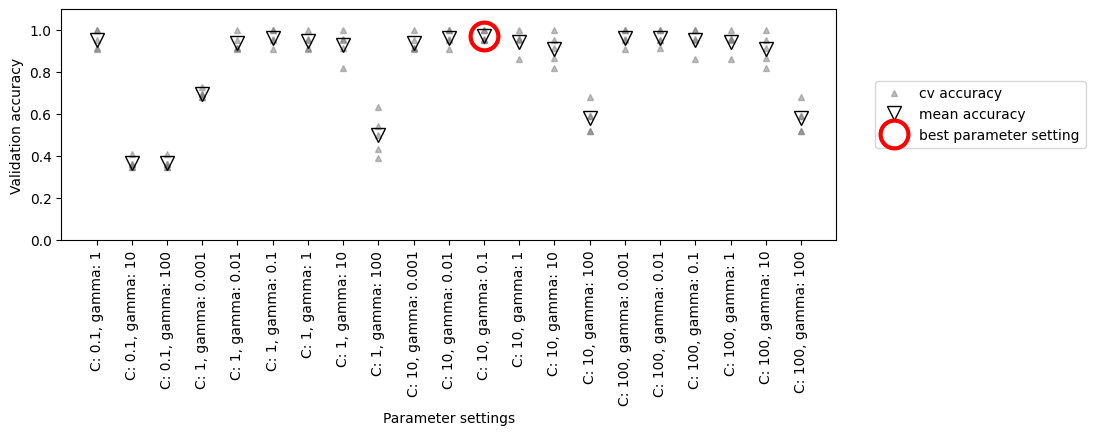

In [21]:
mglearn.plots.plot_cross_val_selection()

For each parameter setting (only a subset is shown), five accuracy values are computed, one for each split in the cross-validation. Then the mean validation accuracy is computed for each parameter setting. The parameters with the highest mean validation accuracy are chosen, marked by the circle.

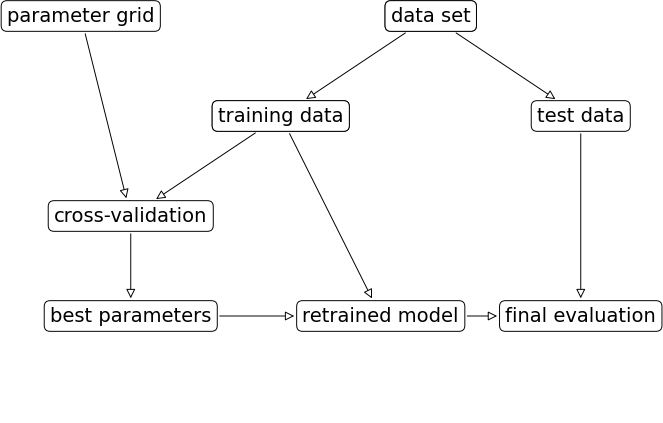

In [23]:
mglearn.plots.plot_grid_search_overview()

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search=GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

GridSearchCV will use cross-validation in place of the split into a training and validation set that we used before. However, we still need to split the data into a training and a test set, to avoid overfitting the parameters

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

The grid_search object that we created behaves just like a classifier; we can call the standard methods fit, predict, and score on it.1 However, when we call fit, it will run cross-validation for each combination of parameters we specified in param_grid

In [28]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Fitting the GridSearchCV object not only searches for the best parameters, but also automatically fits a new model on the whole training dataset with the parameters that yielded the best cross-validation performance. What happens in fit is therefore equivalent to the result of the In[21] code we saw at the beginning of this section. The GridSearchCV class provides a very convenient interface to access the retrained model using the predict and score methods. To evaluate how well the best found parameters generalize, we can call score on the test set

In [29]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [30]:
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best cross validation score: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'C': 10, 'gamma': 0.1}
Best cross validation score: 0.97


In [31]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [34]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003272,0.005066,0.001275,0.001489,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000569,0.000030,0.000405,0.000027,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.001025,0.000452,0.000637,0.000256,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000738,0.000104,0.000538,0.000082,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000740,0.000135,0.000468,0.000026,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In some cases, trying all possible combinations of all parameters as GridSearchCV usually does, is not a good idea. For example, SVC has a kernel parameter, and depending on which kernel is chosen, other parameters will be relevant. If kernel='linear', the model is linear, and only the C parameter is used. If kernel='rbf', both the C and gamma parameters are used (but not other parameters like degree). In this case, searching over all possible combinations of C, gamma, and kernel wouldn’t make sense: if kernel='linear', gamma is not used, and trying different values for gamma would be a waste of time. To deal with these kinds of “conditional” parameters, GridSearchCV allows the param_grid to be a list of dictionaries. Each dictionary in the list is expanded into an independent grid.

## Evaluation Metrics and Scoring

#### Unbalance Datasets

In [39]:
from sklearn.datasets import load_digits

digits=load_digits()
y=digits.target==9

X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

In [41]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [42]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.90
logreg score: 0.98


C:\Users\thami\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion matrices



In [43]:
from sklearn.metrics import confusion_matrix

confusion=confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


The output of confusion_matrix is a two-by-two array, where the rows correspond to the true classes and the columns correspond to the predicted classes. Each entry counts how often a sample that belongs to the class corresponding to the row (here, “not nine” and “nine”) was classified as the class corresponding to the column.

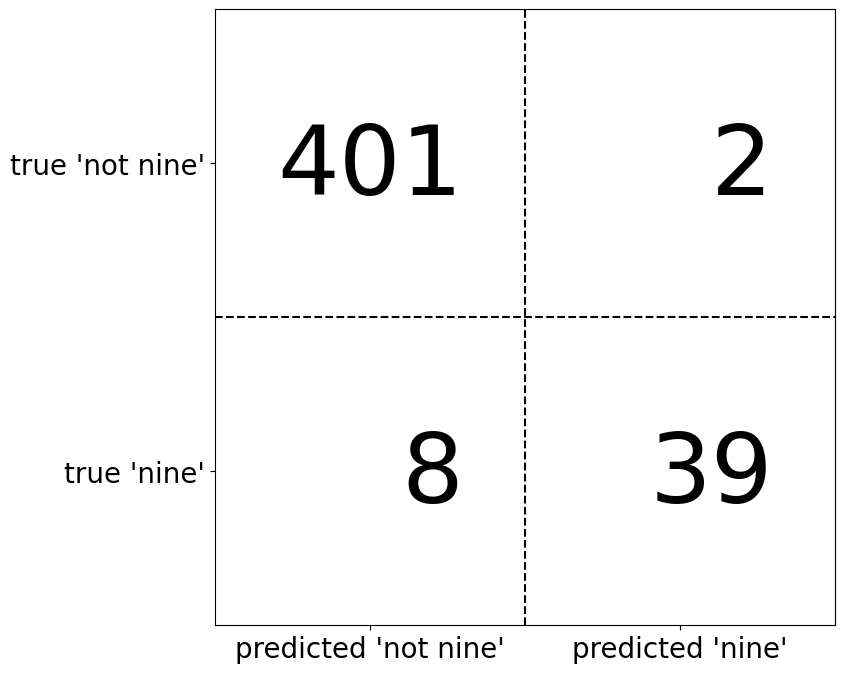

In [44]:
mglearn.plots.plot_confusion_matrix_illustration()